In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('Train_Data.csv')
train_df.head()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,32.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [3]:
test_df = pd.read_csv('Test_Data.csv')
test_df.head()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,77017.0,34.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,12.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,56.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,20.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,64.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12


In [4]:
train_df.shape

(1966, 10)

In [5]:
test_df.shape

(312, 9)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIDAGEYR   1957 non-null   float64
 2   RIAGENDR   1948 non-null   float64
 3   PAQ605     1953 non-null   float64
 4   BMXBMI     1948 non-null   float64
 5   LBXGLU     1953 non-null   float64
 6   DIQ010     1948 non-null   float64
 7   LBXGLT     1955 non-null   float64
 8   LBXIN      1957 non-null   float64
 9   age_group  1952 non-null   object 
dtypes: float64(9), object(1)
memory usage: 153.7+ KB


In [7]:
train_df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,1954.000000,1957.000000,1948.000000,1953.000000,1948.000000,1953.000000,1948.000000,1955.000000,1957.000000
mean,78683.621801,42.005621,1.510267,1.825397,27.965400,99.491039,2.015914,115.150384,11.862892
std,2924.115709,20.147601,0.500023,0.399449,7.327616,16.774665,0.187579,46.271615,9.756713
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76194.000000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.800000
50%,78717.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.030000
75%,81217.000000,58.000000,2.000000,2.000000,31.300000,104.000000,2.000000,131.000000,14.480000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [8]:
train_df['age_group'].value_counts()

age_group
Adult     1638
Senior     314
Name: count, dtype: int64

# EDA

<Axes: >

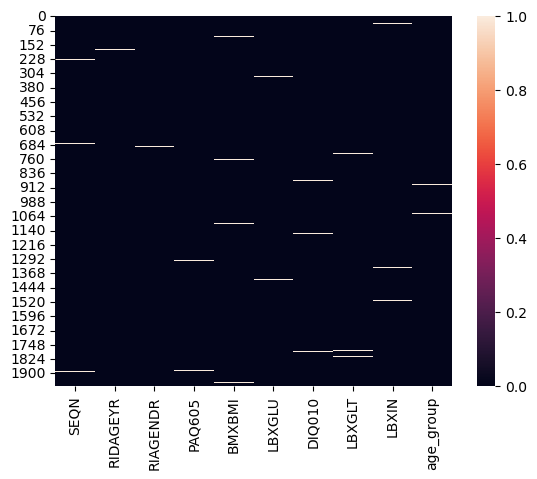

In [10]:
sns.heatmap(train_df.isnull())

<Axes: >

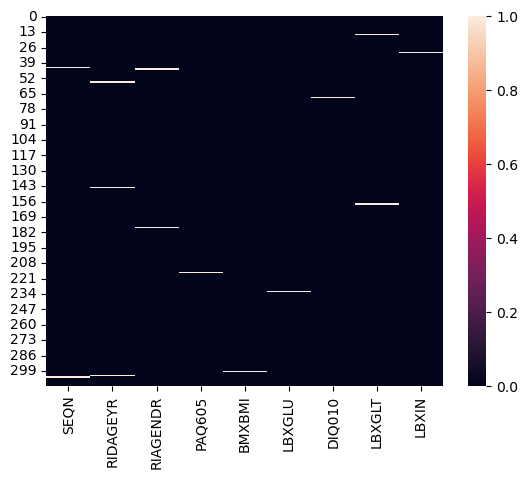

In [11]:
sns.heatmap(test_df.isnull())

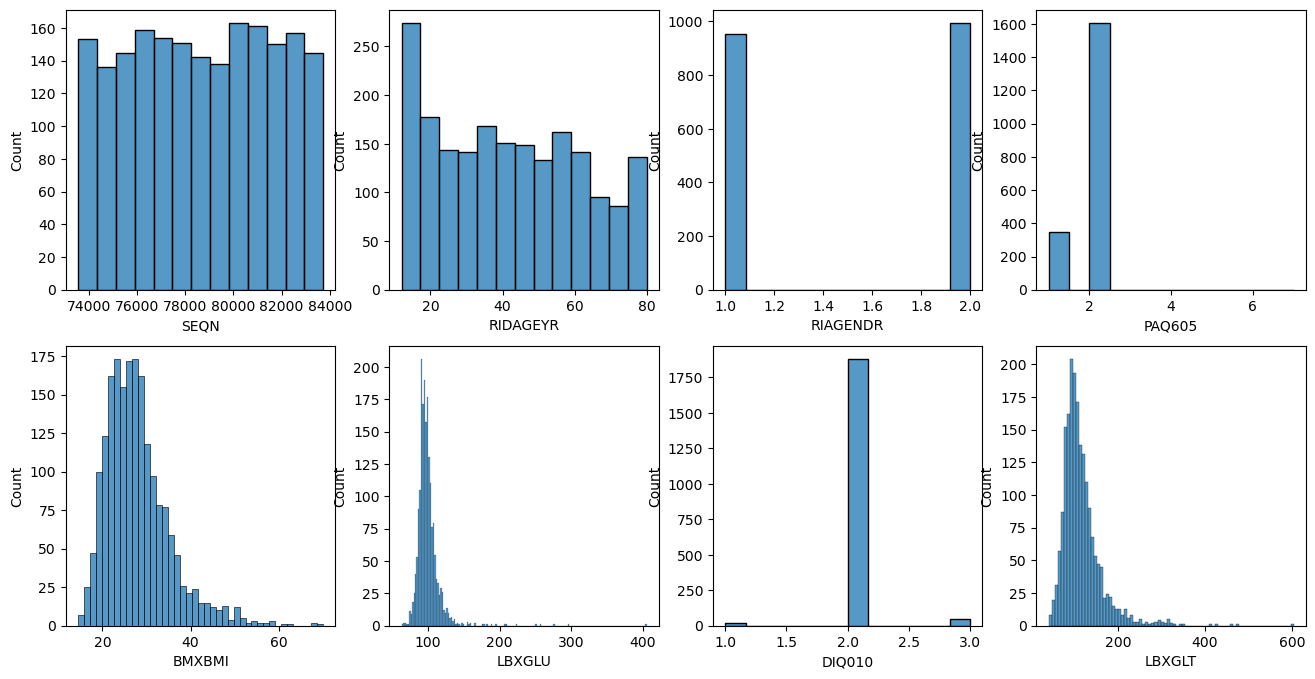

In [12]:
columns_to_plot = train_df.columns[:8]

fig, ax = plt.subplots(2, 4, figsize=(16, 8))
ax = ax.flatten()  

for idx, col in enumerate(columns_to_plot):
    sns.histplot(train_df[col], ax=ax[idx])


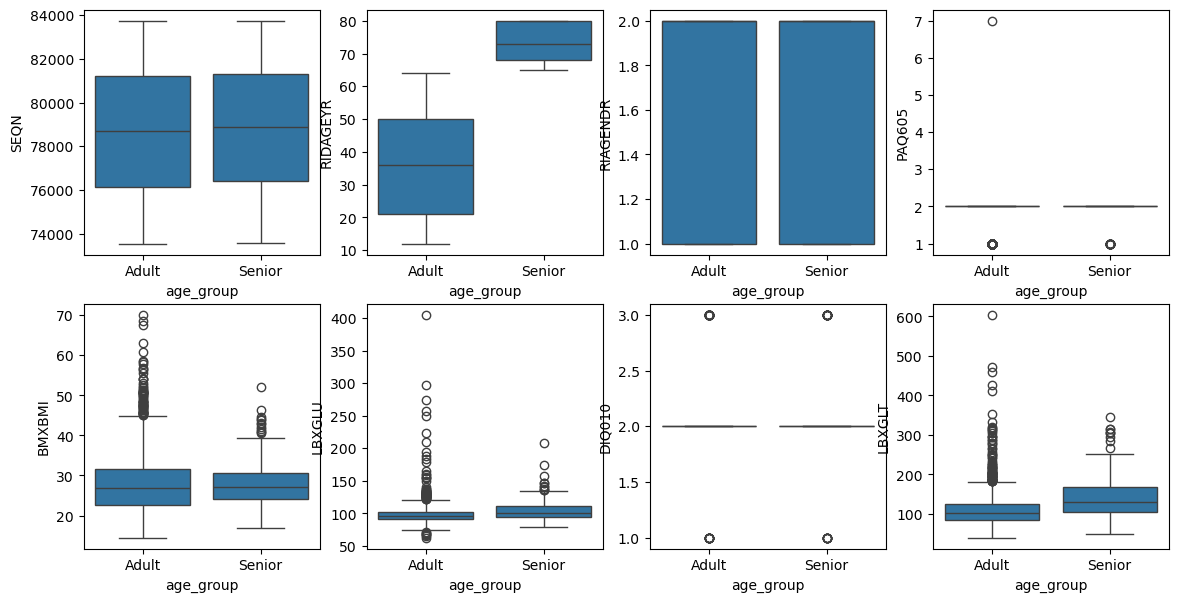

In [13]:
fig, ax = plt.subplots(2,4, figsize=(14,7))
ax= ax.flatten()
for idx,col in enumerate(columns_to_plot):
    sns.boxplot(train_df, y= train_df[col], x= train_df['age_group'], ax=ax[idx])

<Axes: xlabel='RIAGENDR', ylabel='RIDAGEYR'>

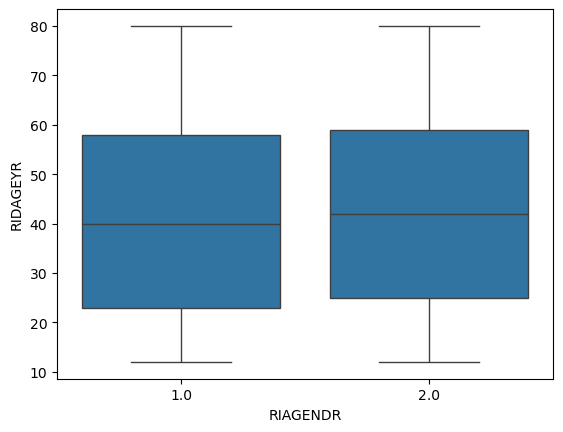

In [14]:
sns.boxplot(train_df, y= train_df['RIDAGEYR'], x= train_df['RIAGENDR'])

In [15]:
train_df[train_df['age_group'].isna()]

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
208,74670.0,80.0,2.0,2.0,27.3,118.0,3.0,154.0,14.44,NaN
360,75492.0,27.0,1.0,2.0,29.3,109.0,2.0,90.0,9.03,NaN
381,75621.0,59.0,2.0,2.0,26.9,99.0,2.0,180.0,25.45,NaN
562,76539.0,36.0,2.0,2.0,19.5,86.0,2.0,108.0,3.78,NaN
684,77144.0,27.0,2.0,1.0,22.2,100.0,2.0,92.0,9.63,NaN
690,77178.0,80.0,2.0,2.0,28.1,166.0,2.0,320.0,8.48,NaN
811,77748.0,80.0,1.0,2.0,23.9,91.0,2.0,101.0,4.76,NaN
895,78199.0,35.0,2.0,2.0,32.5,104.0,2.0,79.0,9.65,NaN
1049,79060.0,31.0,2.0,2.0,26.7,80.0,2.0,80.0,9.81,NaN
1244,80146.0,33.0,1.0,1.0,28.2,92.0,2.0,74.0,6.29,NaN


In [16]:
train_copy = train_df.copy()

train_copy.dropna(subset=['age_group'],inplace=True)

<Axes: >

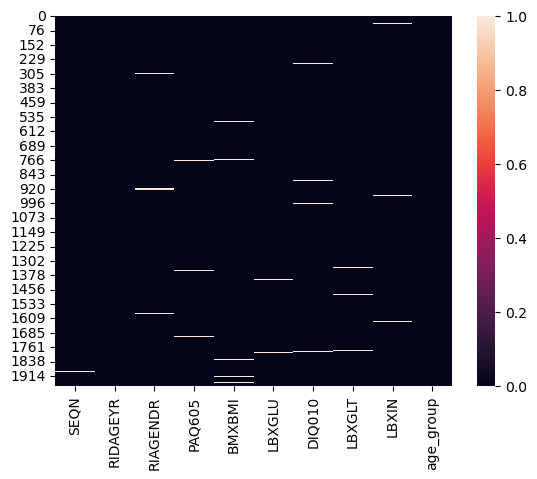

In [17]:
sns.heatmap(train_copy.isnull())

In [18]:
train_copy.columns

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010',
       'LBXGLT', 'LBXIN', 'age_group'],
      dtype='object')

In [19]:
numeric_cols = ['SEQN', 'RIDAGEYR', 'BMXBMI', 'LBXGLU',
               'LBXGLT', 'LBXIN']

categorical_cols = ['RIAGENDR', 'PAQ605', 'DIQ010']

<Axes: >

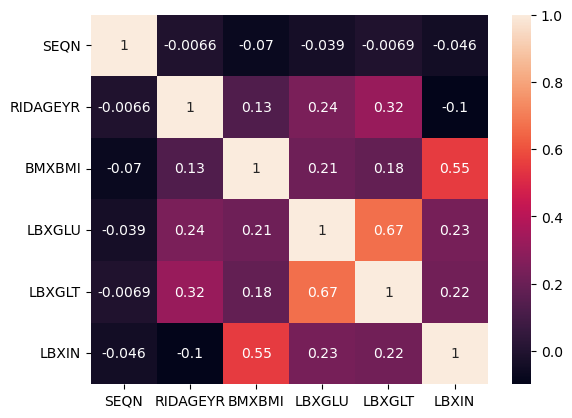

In [20]:
numeric_corr= train_copy[numeric_cols].corr()

sns.heatmap(numeric_corr, annot =True)

<Axes: xlabel='BMXBMI', ylabel='LBXIN'>

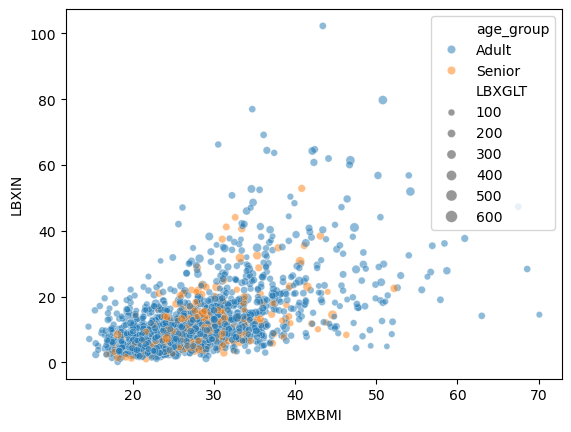

In [21]:
sns.scatterplot(x =train_copy['BMXBMI'], y=train_copy['LBXIN'] , hue = train_copy['age_group']
                , size = train_copy['LBXGLT'], alpha=0.5)

<Axes: xlabel='LBXGLU', ylabel='LBXGLT'>

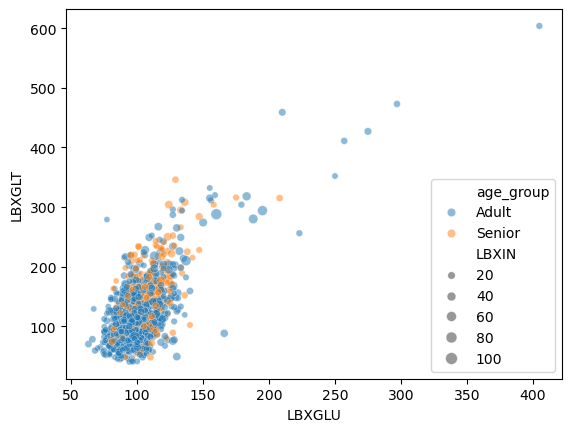

In [22]:
sns.scatterplot(x =train_copy['LBXGLU'] , y=train_copy['LBXGLT'] , hue = train_copy['age_group']
                , size = train_copy['LBXIN'],alpha= 0.5)

# Feature Engineering

In [24]:
train_copy['BMXBMI_LBXIN'] =train_copy['BMXBMI']/train_copy['LBXIN']
train_copy.head()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group,BMXBMI_LBXIN
0,73564.0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult,2.394366
1,73568.0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult,5.272727
2,73576.0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult,3.778502
3,73577.0,32.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult,1.789474
4,73580.0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult,3.287546


In [25]:
train_copy['LBXGLU_LBXGLT'] = train_copy['LBXGLU']/train_copy['LBXGLT']
train_copy.head()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group,BMXBMI_LBXIN,LBXGLU_LBXGLT
0,73564.0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult,2.394366,0.733333
1,73568.0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult,5.272727,1.112500
2,73576.0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult,3.778502,1.308824
3,73577.0,32.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult,1.789474,1.238095
4,73580.0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult,3.287546,1.271605


In [26]:
train_copy.drop(['SEQN','BMXBMI','LBXGLU', 'LBXGLT', 'LBXIN'], axis =1, inplace=True)
train_copy.head()

,RIDAGEYR,RIAGENDR,PAQ605,DIQ010,age_group,BMXBMI_LBXIN,LBXGLU_LBXGLT
0,61.0,2.0,2.0,2.0,Adult,2.394366,0.733333
1,26.0,2.0,2.0,2.0,Adult,5.272727,1.112500
2,16.0,1.0,2.0,2.0,Adult,3.778502,1.308824
3,32.0,1.0,2.0,NaN,Adult,1.789474,1.238095
4,38.0,2.0,1.0,2.0,Adult,3.287546,1.271605


<Axes: >

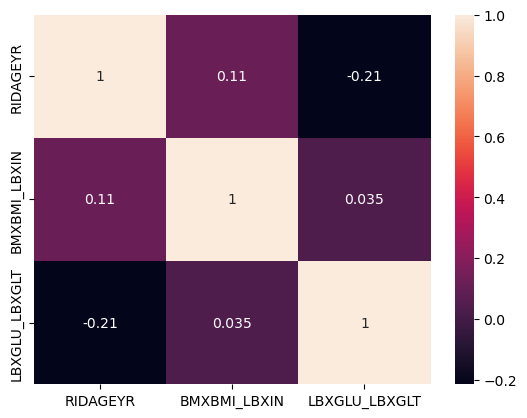

In [27]:
train_corr = train_copy[['RIDAGEYR', 'BMXBMI_LBXIN', 'LBXGLU_LBXGLT']].corr()

sns.heatmap(train_corr, annot =True)

In [28]:
def feature_enigeering(df):
    df['BMXBMI_LBXIN'] =df['BMXBMI']/df['LBXIN']
    df['LBXGLU_LBXGLT'] = df['LBXGLU']/df['LBXGLT']
    df_new = df.drop(['SEQN','BMXBMI','LBXGLU', 'LBXGLT', 'LBXIN','DIQ010', 'PAQ605'], axis =1)
    return df_new

train_df.dropna(subset=['age_group'],inplace=True)
train_new = feature_enigeering(train_df)
test_new = feature_enigeering(test_df)
    
    

In [29]:
train_new.head()

,RIDAGEYR,RIAGENDR,age_group,BMXBMI_LBXIN,LBXGLU_LBXGLT
0,61.0,2.0,Adult,2.394366,0.733333
1,26.0,2.0,Adult,5.272727,1.112500
2,16.0,1.0,Adult,3.778502,1.308824
3,32.0,1.0,Adult,1.789474,1.238095
4,38.0,2.0,Adult,3.287546,1.271605


In [30]:
test_new.head()

,RIDAGEYR,RIAGENDR,BMXBMI_LBXIN,LBXGLU_LBXGLT
0,34.0,1.0,2.131039,0.711111
1,12.0,2.0,1.723460,0.709220
2,56.0,1.0,3.242630,0.786765
3,20.0,2.0,1.821929,0.837838
4,64.0,1.0,7.916667,0.866667


# Data preprocessing



In [32]:
train_new.columns

Index(['RIDAGEYR', 'RIAGENDR', 'age_group', 'BMXBMI_LBXIN', 'LBXGLU_LBXGLT'], dtype='object')

In [33]:
X = train_new[['RIDAGEYR', 'RIAGENDR','BMXBMI_LBXIN',
       'LBXGLU_LBXGLT']]

In [34]:
y = train_new[['age_group']]

In [35]:
y.loc[y['age_group'] == 'Adult'] =0
y.loc[y['age_group'] == 'Senior'] =1

In [36]:
y = y.astype(int)
y.sample(50)

,age_group
1285,0
164,0
1228,0
607,1
272,0
22,0
237,0
1491,0
545,0
1426,0


In [37]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def preprocessing(df):
    df_copy = df.copy()
    numeric_cols = ['RIDAGEYR','BMXBMI_LBXIN','LBXGLU_LBXGLT']
    #categorical_cols = ['RIAGENDR']
    imputer_numeric = SimpleImputer(strategy='mean')
    imputed_numeric_df = pd.DataFrame(imputer_numeric.fit_transform(df_copy[numeric_cols]),
                                      columns=numeric_cols,
                                      index=df.index)
    scaler = StandardScaler()
    imputed_numeric_df_scaled = pd.DataFrame(scaler.fit_transform(imputed_numeric_df),
                                            columns=numeric_cols,
                                            index=df.index)
    #imputer_cat = SimpleImputer(strategy='most_frequent')
    #imputed_cat_df = pd.DataFrame(imputer_cat.fit_transform(df_copy[categorical_cols]),
    #                               columns=categorical_cols,
    #                               index=df.index)
    imputed_scaled_df = imputed_numeric_df_scaled
    
    return imputed_scaled_df

X_clean = preprocessing(X)
test_clean = preprocessing(test_new)
    
    


In [38]:
X_clean.head()

,RIDAGEYR,BMXBMI_LBXIN,LBXGLU_LBXGLT
0,0.947278,-0.324666,-0.770767
1,-0.796433,0.461424,0.584469
2,-1.294636,0.053346,1.286179
3,-0.497511,-0.489865,1.033378
4,-0.198589,-0.080736,1.153150


<Axes: >

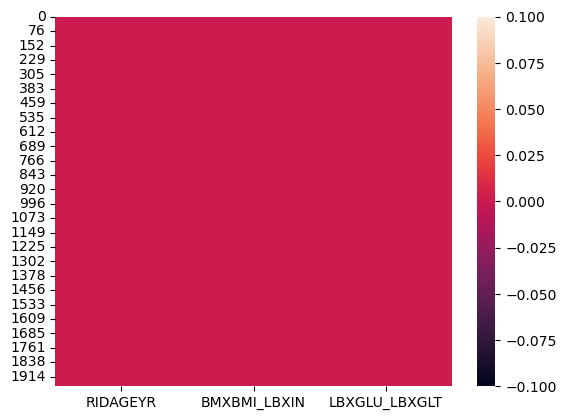

In [39]:
sns.heatmap(X_clean.isnull())

# Building Model

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score,classification_report




In [42]:
models = {
    'dtc': DecisionTreeClassifier(random_state = 42),
         'abc': AdaBoostClassifier(random_state = 42),
         'rfc': RandomForestClassifier(random_state = 42),
         'gbc': GradientBoostingClassifier(random_state = 42),
         'lr': LogisticRegression(random_state = 42),
         'svc': SVC(random_state = 42),
         'xgbc': XGBClassifier(random_state = 42),
} 

params = {
    'dtc': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    'abc': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'rfc': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'gbc': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [8, 38]
    },
    'lr': {
        'penalty': ['l2', 'none'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'saga']
    },
    'svc': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'xgbc': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [8, 38]
    }
}



In [43]:
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X_clean, y)

In [44]:
best_models = {}

for name, model in models.items():
    print(f"Running RandomizedSearchCV for: {name}")
    
    param_dist = params.get(name, {})
    
    if param_dist:
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_dist,
            n_iter=10,
            cv=5,
            scoring='f1',
            random_state=42,
            n_jobs=-1,
            verbose=0
        )
        search.fit(X_res, y_res)
        best_models[name] = {
            'estimator': search.best_estimator_,
            'score': search.best_score_,
            'params': search.best_params_
        }

best_model_name = max(best_models, key=lambda k: best_models[k]['score'])
best_model_info = best_models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Best Cross-Validated f1_sco: {best_model_info['score']:.4f}")
print(f"Best Hyperparameters: {best_model_info['params']}")

Running RandomizedSearchCV for: dtc
Running RandomizedSearchCV for: abc
Running RandomizedSearchCV for: rfc
Running RandomizedSearchCV for: gbc
Running RandomizedSearchCV for: lr
Running RandomizedSearchCV for: svc
Running RandomizedSearchCV for: xgbc
Best Model: abc
Best Cross-Validated f1_sco: 0.9991
Best Hyperparameters: {'n_estimators': 100, 'learning_rate': 0.1}


In [45]:
y_test = pd.read_csv('Sample_Submission.csv')

In [46]:
abc = AdaBoostClassifier(**best_model_info['params'],random_state = 42)

abc.fit(X_clean, y)
y_pred = abc.predict(test_clean)
f1 = f1_score(y_test, y_pred)
print(f"f1_score: {f1:.4f}")
print(classification_report(y_test, y_pred))


f1_score: 0.1176
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       262
           1       0.12      0.12      0.12        50

    accuracy                           0.71       312
   macro avg       0.47      0.47      0.47       312
weighted avg       0.72      0.71      0.71       312



In [47]:
y_pred = pd.DataFrame(y_pred, columns =y_test.columns, index= y_test.index)
y_pred.to_csv('final_submission.csv', index = False)